# Lógica fuzzy: educação, experiência & salário

- Antecedentes:
    - Educação: baixa, média & alta;
    - Experiência: baixa, média & alta.

- Consequente:
    - Remuneração: muito baixa, baixa, média, alta & muito alta;

Conjunto de Regras:
1. se a educação é baixa E a experiência é baixa, então o salário é muito baixo;
2. se a educação é baixa E a experiência é média, então o salário é baixo;
3. se a educação é baixa E a experiência é alta, então o salário é médio;
4. se a educação é média E a experiência é baixa, então o salário é baixo;
5. se a educação é média E a experiência é média, então o salário é médio;
6. se a educação é média E a experiência alta, então o salário é alto;
7. se a educação é alta E a experiência é baixa, então o salário é médio;
8. se a escolaridade é alta E a experiência é média, então o salário é alto;
9. se a escolaridade é alta E a experiência é alta, então o salário é muito alto.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
educacao = ctrl.Antecedent(np.arange(0,15+1),
                           "anos educacao")
experiencia = ctrl.Antecedent(np.arange(0,25+1),
                              "anos experiencia")

remuneracao = ctrl.Consequent(np.arange(20,200+1,10),
                              "remuneracao")

## Membership functions

In [3]:
educacao['baixa'] = fuzz.gaussmf(educacao.universe,
                                 mean=2.5, sigma=0.5)
educacao['media'] = fuzz.gaussmf(educacao.universe,
                                 mean=7.5, sigma=0.5)
educacao['alta'] = fuzz.gaussmf(educacao.universe,
                                 mean=12.5, sigma=0.5)

In [4]:
experiencia['baixa'] = fuzz.gaussmf(experiencia.universe,
                                    mean=5, sigma=0.5)
experiencia['media'] = fuzz.gaussmf(experiencia.universe,
                                    mean=15, sigma=0.5)
experiencia['alta'] = fuzz.gaussmf(experiencia.universe,
                                   mean=20, sigma=0.5)

t:\college\College_tasks\7_Seventh_semester\AI\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


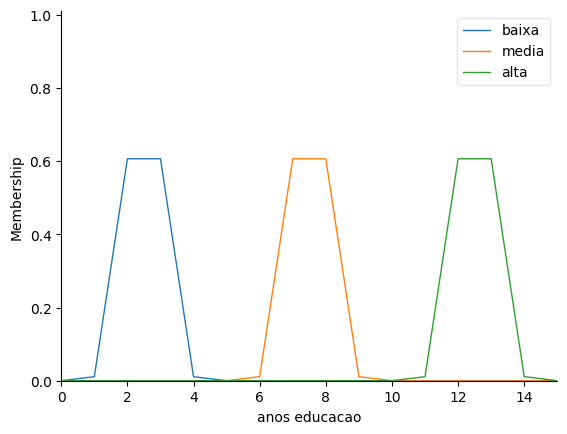

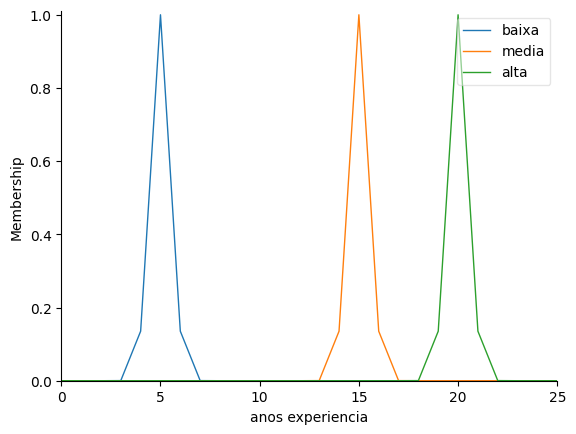

In [5]:
educacao.view()
experiencia.view()

In [6]:
remuneracao['muito baixa'] = fuzz.gaussmf(remuneracao.universe,
                                          mean=40,sigma=0.5)
remuneracao['baixa'] = fuzz.gaussmf(remuneracao.universe,
                                    mean=60,sigma=0.5)
remuneracao['media'] = fuzz.gaussmf(remuneracao.universe,
                                    mean=100,sigma=0.5)
remuneracao['alta'] = fuzz.gaussmf(remuneracao.universe,
                                   mean=150,sigma=0.5)
remuneracao['muito alta'] = fuzz.gaussmf(remuneracao.universe,
                                         mean=180,sigma=0.5)

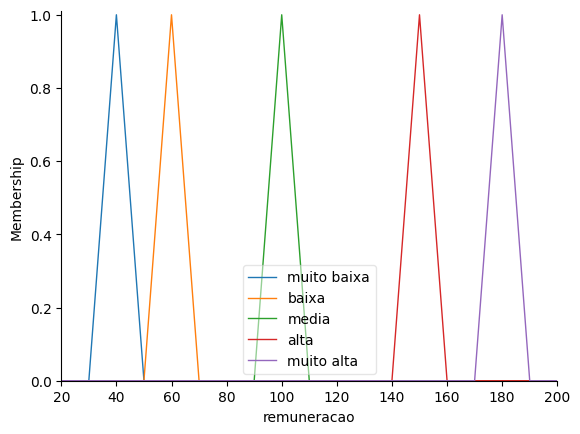

In [7]:
remuneracao.view()

## Regras do sistema

In [8]:
# Educação baixa
regra1 = ctrl.Rule(
    educacao['baixa'] & experiencia['baixa'],
    remuneracao['muito baixa'])
regra2 = ctrl.Rule(
    educacao['baixa'] & experiencia['media'],
    remuneracao['baixa'])
regra3 = ctrl.Rule(
    educacao['baixa'] & experiencia['alta'],
    remuneracao['media'])
# Educação média
regra4 = ctrl.Rule(
    educacao['media'] & experiencia['baixa'],
    remuneracao['baixa'])
regra5 = ctrl.Rule(
    educacao['media'] & experiencia['media'],
    remuneracao['media'])
regra6 = ctrl.Rule(
    educacao['media'] & experiencia['alta'],
    remuneracao['alta'])
# Educação alta
regra7 = ctrl.Rule(
    educacao['alta'] & experiencia['baixa'],
    remuneracao['media'])
regra8 = ctrl.Rule(
    educacao['alta'] & experiencia['media'],
    remuneracao['alta'])
regra9 = ctrl.Rule(
    educacao['alta'] & experiencia['alta'],
    remuneracao['muito alta'])

## Sistema de controle

In [9]:
sistema_controle = ctrl.ControlSystem(
    [regra1, regra2, regra3,
     regra4, regra5, regra6,
     regra7, regra8, regra9])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

Salário: $164.95k


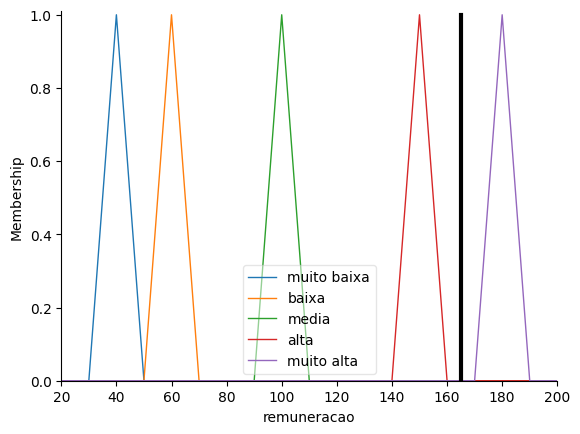

In [10]:
# Exemplo de teste
sistema.input['anos educacao'] = 10
sistema.input['anos experiencia'] = 18.6
sistema.compute()

print(f"Salário: ${sistema.output['remuneracao']:.2f}k")

remuneracao.view(sim = sistema)